In [101]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [172]:
test = pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [102]:
train.drop(['Loan_ID','Gender','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area'],axis = 'columns',inplace = True)
train.head()

,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status
0,No,0,Graduate,No,1.0,Y
1,Yes,1,Graduate,No,1.0,N
2,Yes,0,Graduate,Yes,1.0,Y
3,Yes,0,Not Graduate,No,1.0,Y
4,No,0,Graduate,No,1.0,Y


In [173]:
test.drop(['Loan_ID','Gender','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area'],axis = 'columns',inplace = True)
test.head()

,Married,Dependents,Education,Self_Employed,Credit_History
0,Yes,0,Graduate,No,1.0
1,Yes,1,Graduate,No,1.0
2,Yes,2,Graduate,No,1.0
3,Yes,2,Graduate,No,NaN
4,No,0,Not Graduate,No,1.0


In [103]:
train.shape

(614, 6)

In [174]:
test.shape

(367, 5)

In [104]:
train.isna().sum()

Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Loan_Status        0
dtype: int64

In [175]:
test.isna().sum()

Married            0
Dependents        10
Education          0
Self_Employed     23
Credit_History    29
dtype: int64

In [105]:
train['Credit_History'] = train['Credit_History'].fillna(1.0)
train['Dependents'] = train['Dependents'].fillna('0')
train['Self_Employed'] = train['Self_Employed'].fillna('No')

In [176]:
test['Credit_History'] = test['Credit_History'].fillna(1.0)
test['Dependents'] = test['Dependents'].fillna('0')
test['Self_Employed'] = test['Self_Employed'].fillna('No')

In [106]:
train.isna().sum()

Married           3
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Loan_Status       0
dtype: int64

In [178]:
test.isna().sum()

Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
dtype: int64

In [107]:
train.dropna(inplace = True)

In [108]:
train.isna().sum()

Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Loan_Status       0
dtype: int64

In [109]:
train.head()

,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status
0,No,0,Graduate,No,1.0,Y
1,Yes,1,Graduate,No,1.0,N
2,Yes,0,Graduate,Yes,1.0,Y
3,Yes,0,Not Graduate,No,1.0,Y
4,No,0,Graduate,No,1.0,Y


In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [111]:
train['Married'] = le.fit_transform(train['Married'])
train['Dependents'] = le.fit_transform(train['Dependents'])
train['Education'] = le.fit_transform(train['Education'])
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
train.head()

,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status
0,0,0,0,0,1.0,1
1,1,1,0,0,1.0,0
2,1,0,0,1,1.0,1
3,1,0,1,0,1.0,1
4,0,0,0,0,1.0,1


In [179]:
test['Married'] = le.fit_transform(test['Married'])
test['Dependents'] = le.fit_transform(test['Dependents'])
test['Education'] = le.fit_transform(test['Education'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
test.head()

,Married,Dependents,Education,Self_Employed,Credit_History
0,1,0,0,0,1.0
1,1,1,0,0,1.0
2,1,2,0,0,1.0
3,1,2,0,0,1.0
4,0,0,1,0,1.0


In [114]:
x = train.drop('Loan_Status',axis = 'columns')
y = train.Loan_Status

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [188]:
cross_val_score(LogisticRegression(),x,y)

array([0.81300813, 0.7704918 , 0.78688525, 0.85245902, 0.81967213])

In [189]:
cross_val_score(RandomForestClassifier(),x,y)

array([0.78861789, 0.7704918 , 0.77868852, 0.81967213, 0.81967213])

In [190]:
cross_val_score(SVC(),x,y)

array([0.81300813, 0.7704918 , 0.78688525, 0.85245902, 0.81967213])

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [192]:
reg = LogisticRegression()

In [193]:
reg.fit(x_train,y_train)

LogisticRegression()

In [194]:
reg.score(x_test,y_test)

0.8211382113821138

In [195]:
y_predicted = reg.predict(x_test)

In [196]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[16, 20],
       [ 2, 85]], dtype=int64)

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Truth')

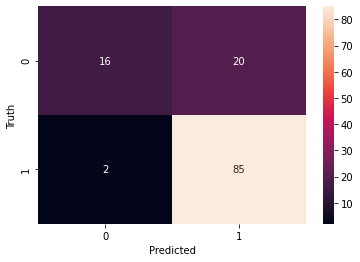

In [198]:
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [199]:
train.head()

,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status
0,0,0,0,0,1.0,1
1,1,1,0,0,1.0,0
2,1,0,0,1,1.0,1
3,1,0,1,0,1.0,1
4,0,0,0,0,1.0,1


In [200]:
test.head()

,Married,Dependents,Education,Self_Employed,Credit_History
0,1,0,0,0,1.0
1,1,1,0,0,1.0
2,1,2,0,0,1.0
3,1,2,0,0,1.0
4,0,0,1,0,1.0


In [201]:
final_ans = reg.predict(test)